Import libraries and modules

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import diabetes.csv file

In [9]:
stats = pd.read_csv('/content/sample_data/diabetes.csv')

**DATA EXPLORATION**

In [14]:
stats.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data statistics

In [15]:
stats.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
stats_len = len(stats)
stats_len

768

Percentage of people in dataset that has diabetes

In [27]:
has_diabetes_perc=(len(stats[stats.Outcome == 1])/stats_len)*100
has_diabetes_perc


34.89583333333333

**Data validation**

Remove last column - Outcome - get the stats dataset without outcome

In [11]:
stats_no_outcome = stats[stats.columns[0:8]]
stats_no_outcome

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


Count valid values (non-zero) for each parameter (column) (for these variables, having values = 0 does not make sense)

In [14]:
valid_values_perc = ((stats_no_outcome.astype(bool).sum(axis=0))/stats_len) * 100
round(valid_values_perc,1)

Pregnancies                  85.5
Glucose                      99.3
BloodPressure                95.4
SkinThickness                70.4
Insulin                      51.3
BMI                          98.6
DiabetesPedigreeFunction    100.0
Age                         100.0
dtype: float64

Count invalid values (=0) for each parameter (column)

In [15]:
invalid_values_perc = (((stats_no_outcome==0).sum(axis=0))/stats_len)*100
round(invalid_values_perc,1)

Pregnancies                 14.5
Glucose                      0.7
BloodPressure                4.6
SkinThickness               29.6
Insulin                     48.7
BMI                          1.4
DiabetesPedigreeFunction     0.0
Age                          0.0
dtype: float64

We see that:

*   For all of them Diabetes Pedigree Function and Age were registered
*   For almost all of them, Glucose was registered
*   For some, Blood Pressure, Skin Thickness, Insuline and BMI were not registered 

**Studying Glucose**

Percentage of people with normal glucose levels - between 72 to 99 (when fasting)

In [16]:
normal_glucose = (len(stats[(stats.Glucose>72) & (stats.Glucose<99)])/stats_len)*100
round(normal_glucose,1)

20.7

Percentage of people with high glucose that have diabetes 

In [17]:
high_glucose_diabetes = len(stats[(stats.Glucose>99) & (stats.Outcome==1)])/len(stats[stats.Glucose>99])*100
round(high_glucose_diabetes,1)

44.1

**Studying Blood Pressure**

Invalid Blood Pressure

In [18]:
invalid_blood_pressure = (len(stats[stats.BloodPressure == 0])/stats_len)*100
round(invalid_blood_pressure,1)

4.6

Percentage of people with high Blood Pressure that have diabetes

In [20]:
high_blood_pressure_diabetes = len(stats[(stats.BloodPressure>70) & (stats.Outcome==1)])/len(stats[stats.BloodPressure>70])*100 
round(high_blood_pressure_diabetes,1)

40.5

**DATA VISUALIZATION**

In [21]:
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 12})
sns.set(style="darkgrid")

**Multi-plot grid**

*   Histograms to study data distribution per parameter
*   Lineplots and probability density function (KDE) plots to study relationships between parameters

<Figure size 640x480 with 0 Axes>

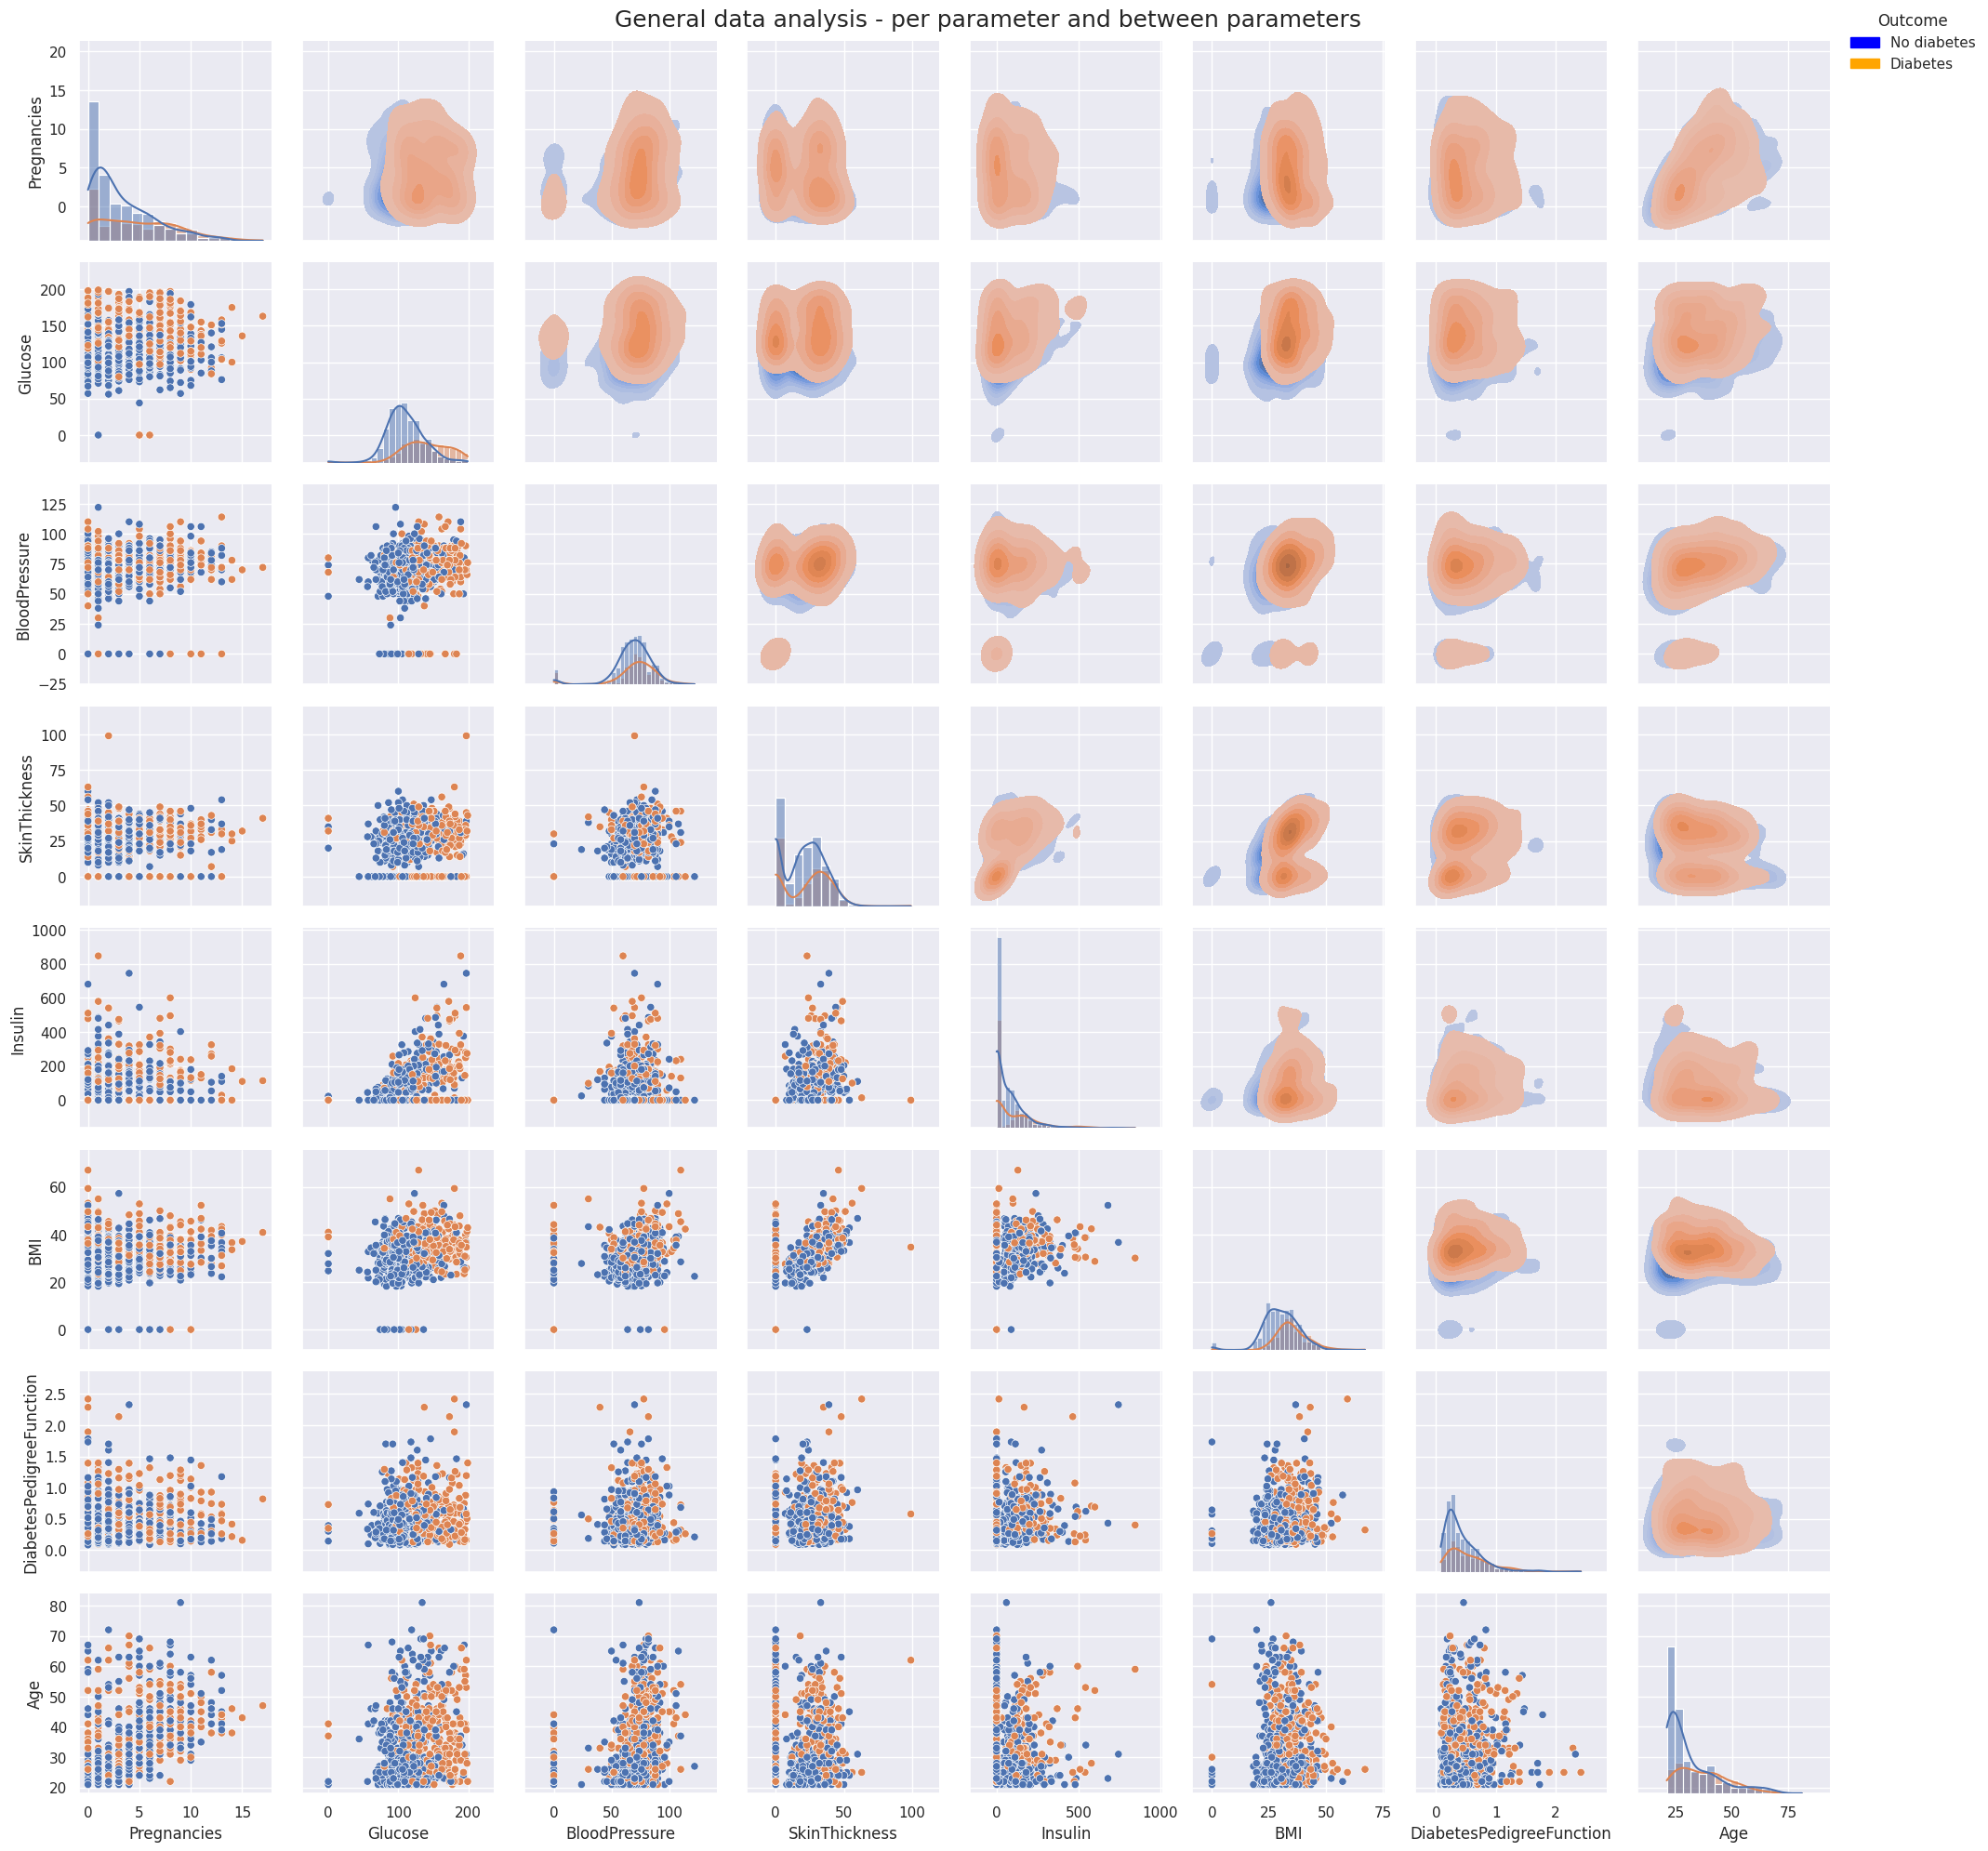

In [24]:
plt.figure()
g = sns.PairGrid(stats, hue="Outcome")
g.map_diag(sns.histplot, kde=True)
g.map_upper(sns.kdeplot, fill=True)
g.map_lower(sns.scatterplot)
blue_patch = mpatches.Patch(color='blue', label='No diabetes')
red_patch = mpatches.Patch(color='orange', label='Diabetes')
g.add_legend(loc="upper right", handles=[blue_patch, red_patch])
plt.suptitle("General data analysis - per parameter and between parameters", y=1, fontsize=18)
plt.show()

**Correlation matrix**

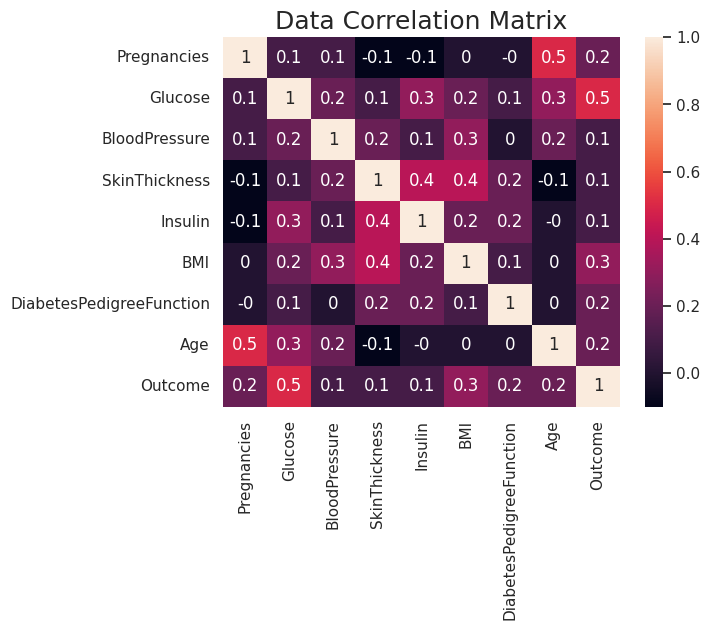

In [23]:
plt.figure()
matrix = stats.corr().round(1)
sns.heatmap(matrix, annot=True)
plt.title('Data Correlation Matrix', fontsize=18)
plt.show()

Convert Outcome column to interpret it as a categorical feature

In [25]:
stats.Outcome = stats.Outcome.astype('category')

In [26]:
col=stats.columns

**Histograms**

<Figure size 640x480 with 0 Axes>

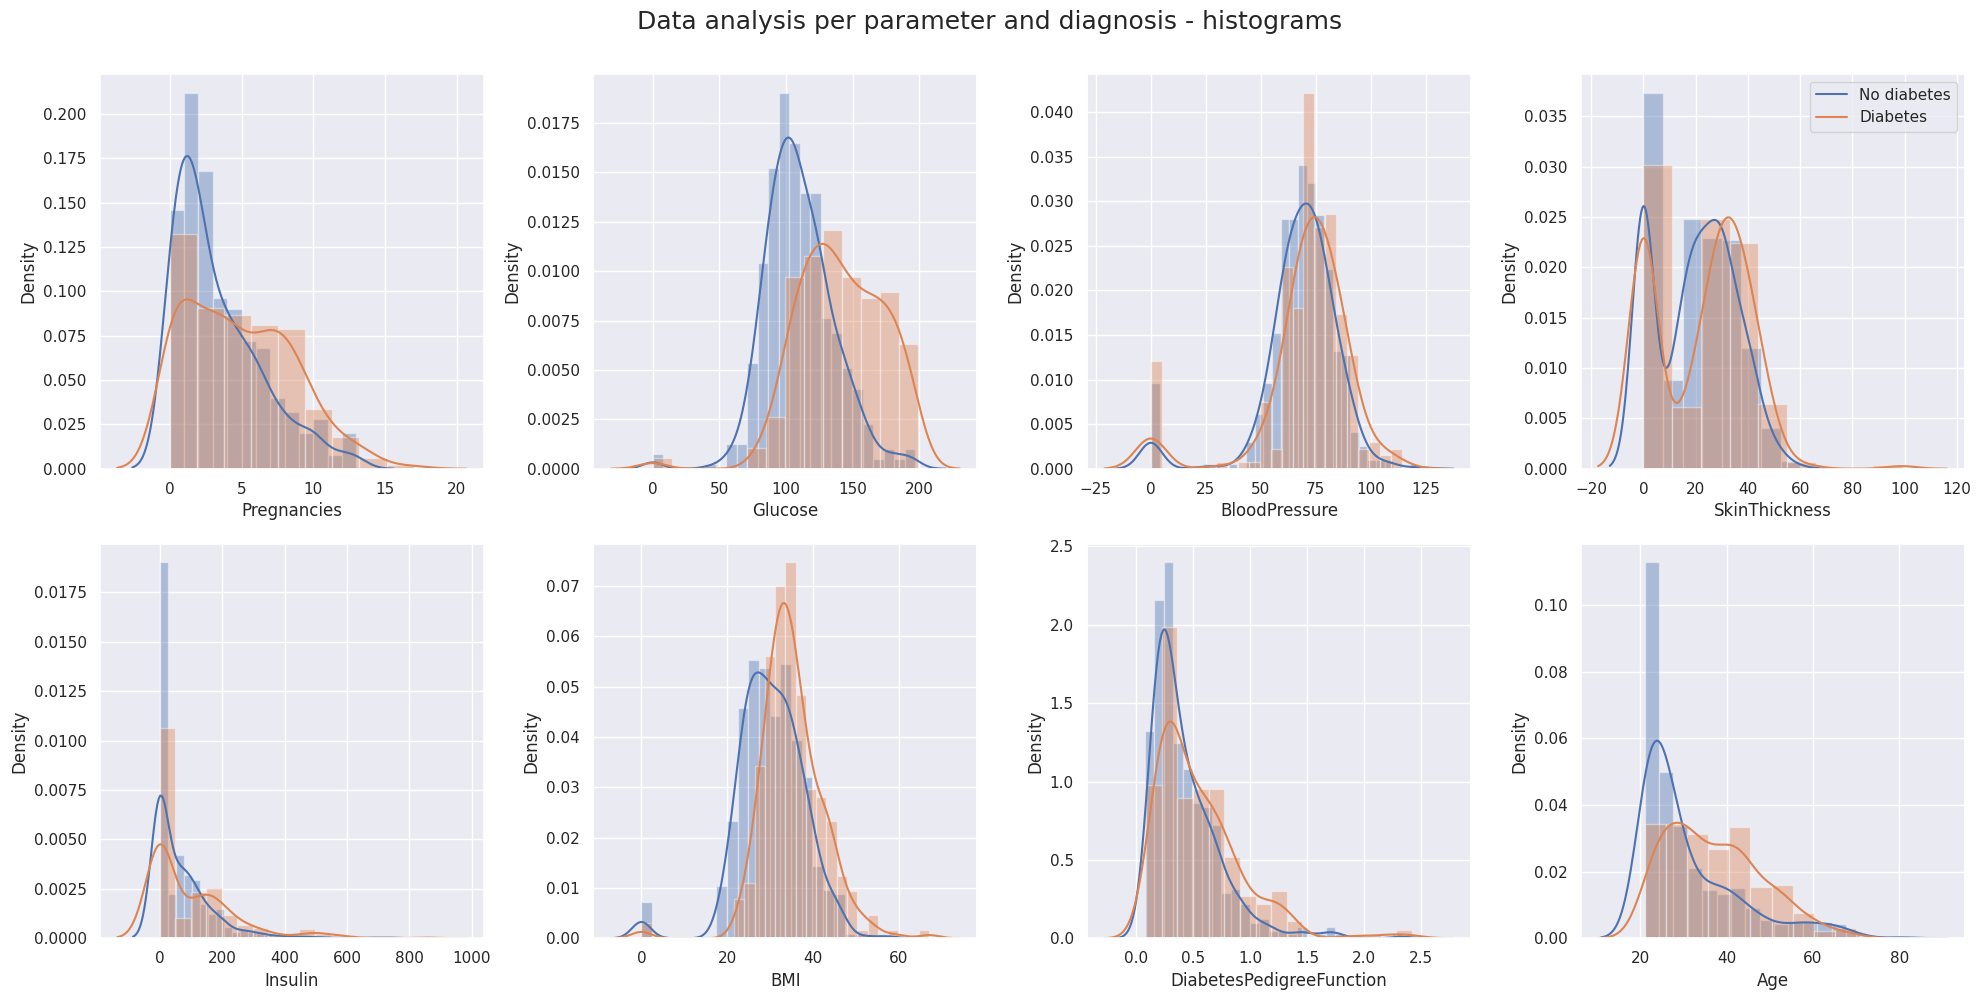

In [28]:
plt.figure()
fig4, axes4 = plt.subplots(nrows=4, ncols=2, figsize=(20,10))
axes4 = fig4.add_subplot()
plt.tight_layout()
for i in range(len(col)-1):
    for outcome in stats.Outcome.cat.categories:
        plt.subplot(2,4,i+1)
        sns.distplot(stats[stats.Outcome == outcome][col[i]])
plt.subplot(2,4,4).legend(['No diabetes', 'Diabetes'], loc='upper right')
plt.suptitle("Data analysis per parameter and diagnosis - histograms", y=1, fontsize=18)
fig4.tight_layout(pad=1.2)
plt.show()

**Boxplots**

<Figure size 640x480 with 0 Axes>

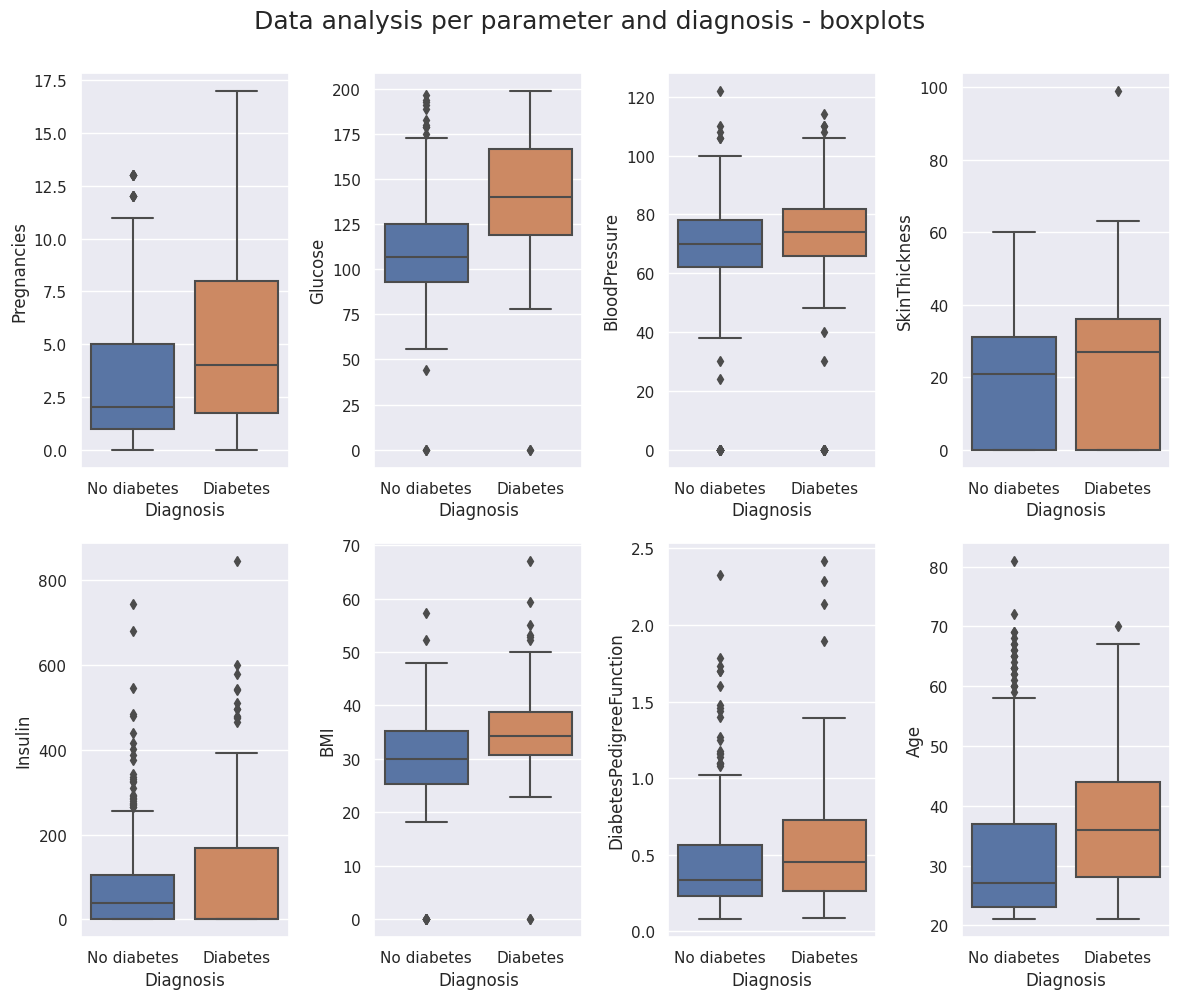

In [30]:
plt.figure()
fig5, ax5 = plt.subplots(nrows=2, ncols=4, figsize=(12,10))
ax5 = fig5.add_subplot()
plt.tight_layout()
for i in range(len(col)-1):
    plt.subplot(2,4,i+1)
    sns.boxplot(data=stats, x='Outcome', y=col[i])
    plt.xticks([0, 1], ['No diabetes', 'Diabetes'])
    plt.xlabel('Diagnosis')    
plt.suptitle("Data analysis per parameter and diagnosis - boxplots", y=1, fontsize=18)
fig5.tight_layout(pad=1.2)
plt.show()

**Violinplots**

<Figure size 640x480 with 0 Axes>

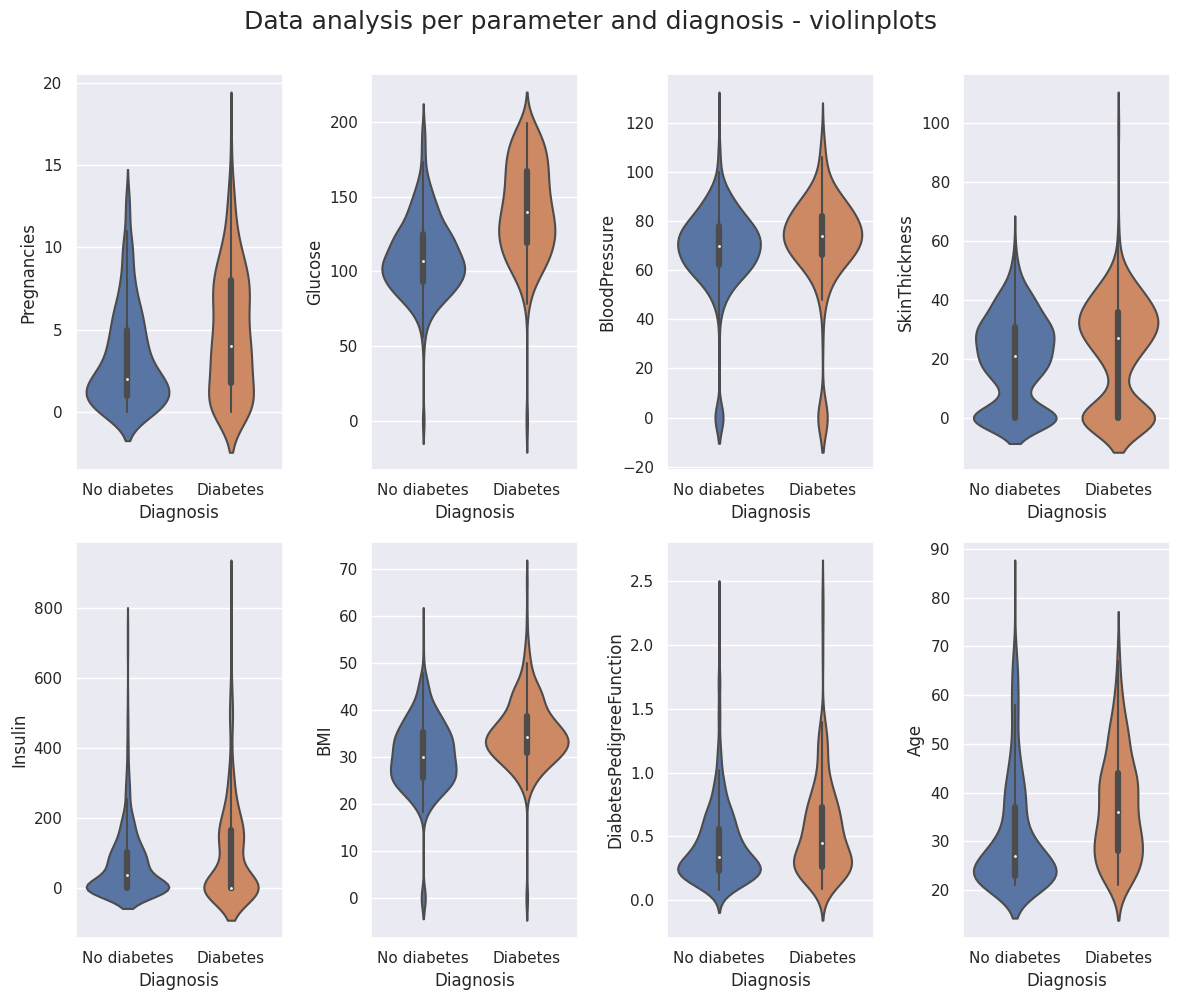

In [31]:
plt.figure()
fig6, ax6 = plt.subplots(nrows=2, ncols=4, figsize=(12,10))
ax6 = fig5.add_subplot()
plt.tight_layout()
for i in range(len(col)-1):
    plt.subplot(2,4,i+1)
    sns.violinplot(data=stats, x='Outcome', y=col[i]) 
    plt.xticks([0, 1], ['No diabetes', 'Diabetes'])
    plt.xlabel('Diagnosis') 
plt.suptitle("Data analysis per parameter and diagnosis - violinplots", y=1, fontsize=18)
fig6.tight_layout(pad=1.2)     
plt.show()

**Studying Glucose - Histogram**

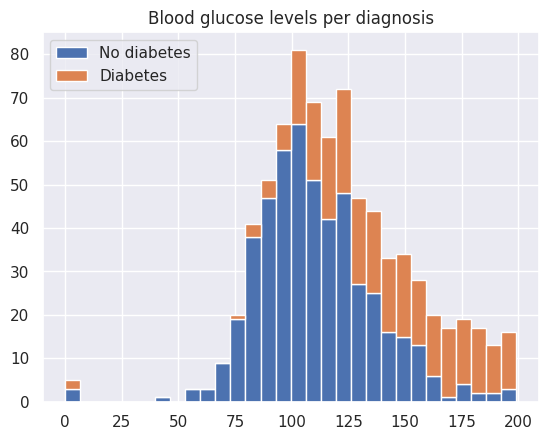

In [37]:
plt.figure()
glucose_list = []
mylabels=[]
for outcome in stats.Outcome.cat.categories:
    glucose_list.append(stats[stats.Outcome == outcome].Glucose)
    mylabels.append(outcome)

mylabels[0] = 'No diabetes'
mylabels[1] = 'Diabetes'
glucose_h = plt.hist(glucose_list, bins=30, stacked=True, label = mylabels)
plt.legend(loc="upper left")
plt.title('Blood glucose levels per diagnosis')
plt.show()

**CONCLUSIONS**:

**Comparing parameter** we see linear relationships between: 
- Insulin and Skin Thickness
- BMI and Skin Thickness
- Glucose and Insulin

**Studying the relationship between diabetes and each parameter**, we can conclude that diabetes is mainly related with:
- High glucose levels